In [1]:
         # Complete OCP Optimal Algae Control Model

using OptimalControl
using NLPModelsIpopt
using Plots
using MadNLP

# ------------------ Parameters ------------------
kP = 1.6
K = 140.0
I0 = 300.0
α = 0.1
kR_bar = 1.5
z_bar = 35.0
tf = 100.0
L=50
epsilon=0.01

# ------------------ Biological Functions ------------------
function OCP(c0=0.1, p0=0.8, z0=5, L=50; u2max=20.0, n=1)
    function I_light(z)
    return I0 * exp(-α * z)
    end

    function vP(p, z)
    return kP * p * I_light(z) / (K + p * I_light(z))
    end

    function kR(z)
    return kR_bar * z^n / (z_bar^n + z^n)
    end


    ocp = @def begin
    t ∈ [0, tf], time
    x = (c, p, z) ∈ R^3, state
    U ∈ R^2, control
    c(0) == c0
    p(0) == p0
    z(0) == z0
    0 ≤ U(t)[1] ≤ 1
    -u2max ≤ U(t)[2] ≤ u2max
    0 ≤ c(t) ≤ 1
    0 ≤ p(t) ≤ 1
    0 ≤ z(t) ≤ L
    c(t) + p(t) ≤ 1
    ẋ(t) == [
        vP(p(t), z(t)) * (1 - c(t)) - kR(z(t)) * c(t) * (1 - c(t) - p(t)),
        U(t)[1] * kR(z(t)) * c(t) * (1 - c(t) - p(t)) - vP(p(t), z(t)) * p(t),
        U(t)[2]
    ]
    ∫(vP(p(t), z(t)) - epsilon * U(t)[2]^2) → max
    end

    sol1 = solve(ocp, :direct, :adnlp, :madnlp; disc_method = :gauss_legendre_2, grid_size = 50, display = false)
    sol2 = solve(ocp, :direct, :adnlp, :madnlp; disc_method = :gauss_legendre_2, init = sol1, grid_size = 100, display = false)
    sol3 = solve(ocp, :direct, :adnlp, :madnlp; disc_method = :gauss_legendre_2, init = sol2, grid_size = 200, display = false)
    sol4 = solve(ocp, :direct, :adnlp, :ipopt; disc_method = :gauss_legendre_2, init = sol3, grid_size = 300, display = false)
    sol5 = solve(ocp, :direct, :adnlp, :ipopt; disc_method = :gauss_legendre_2, init = sol4, grid_size = 400, display = false)
    sol6 = solve(ocp, :direct, :adnlp, :ipopt; disc_method = :gauss_legendre_2, init = sol5, grid_size = 500, display = false)
    sol7 = solve(ocp, :direct, :adnlp, :ipopt; disc_method = :gauss_legendre_2, init = sol6, grid_size = 600, display = false)
    sol8 = solve(ocp, :direct, :adnlp, :ipopt; disc_method = :gauss_legendre_2, init = sol7, grid_size = 700, display = false)
    sol  = solve(ocp, :direct, :adnlp, :ipopt; disc_method = :gauss_legendre_2, init = sol8, grid_size = 800, display = true)

    # ------------------ Results Visualization ------------------
    plt = plot(sol)
    display(plt)
end

OCP (generic function with 5 methods)

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_f4NWrY7KJ6\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_HIl6lkpQVW\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_fGl2bIpy9U\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_FwZIdKRMvw\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzS

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.8.0.

Number of nonzeros in equality constraint Jacobian...:    59204
Number of nonzeros in inequality constraint Jacobian.:     3204
Number of nonzeros in Lagrangian Hessian.............:    44000

Total number of variables............................:    11204
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     2403
                     variables with only upper bounds:        0
Total number of equality constraints.................:     9604
Total number of inequality constraints...............:     2403
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:     1602
        inequality constraints with only upper bounds:      801

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.35e+00 1.00e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00 

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_viXoNoXcro\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_fe1AV6tYLU\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


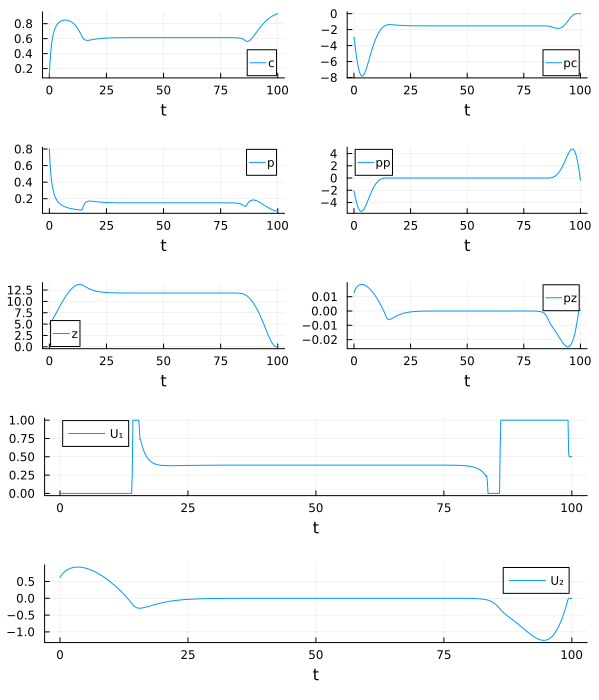

In [2]:
OCP(;u2max = 34,n=1)

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_jot0VCtUH2\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_DuxYR2vWZO\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_vcRM1q3Gbm\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_xAVYd8z6jY\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzS

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.8.0.

Number of nonzeros in equality constraint Jacobian...:    59204
Number of nonzeros in inequality constraint Jacobian.:     3204
Number of nonzeros in Lagrangian Hessian.............:    44000

Total number of variables............................:    11204
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     2403
                     variables with only upper bounds:        0
Total number of equality constraints.................:     9604
Total number of inequality constraints...............:     2403
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:     1602
        inequality constraints with only upper bounds:      801

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.35e+00 1.00e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00 

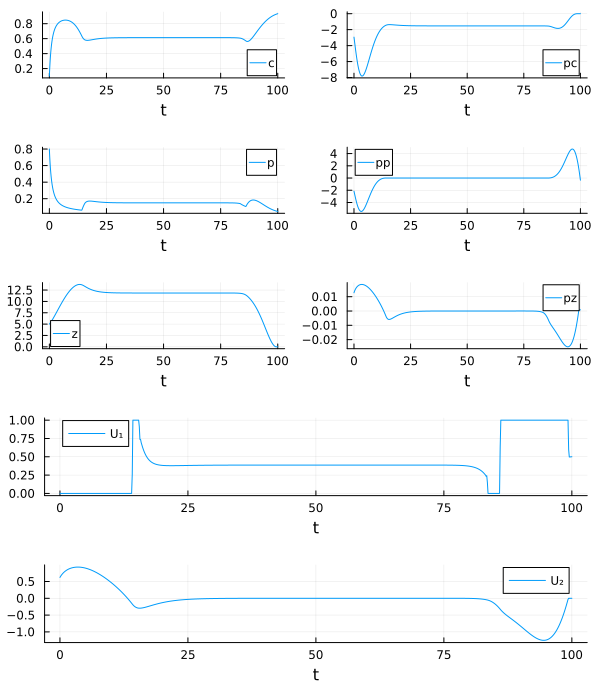

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_RgPUvktaJY\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_jAB0hIFqHI\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


In [3]:
OCP(;u2max = 20,n=1)

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_l4Pc70HoPo\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_9Kd4p8NMp6\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_xEdMXexytu\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_DGpoBQRwpS\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzS

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.8.0.

Number of nonzeros in equality constraint Jacobian...:    59204
Number of nonzeros in inequality constraint Jacobian.:     3204
Number of nonzeros in Lagrangian Hessian.............:    44000

Total number of variables............................:    11204
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     2403
                     variables with only upper bounds:        0
Total number of equality constraints.................:     9604
Total number of inequality constraints...............:     2403
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:     1602
        inequality constraints with only upper bounds:      801

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.35e+00 1.00e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00 

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_tk96nKxsjC\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_nCPU10FyRY\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


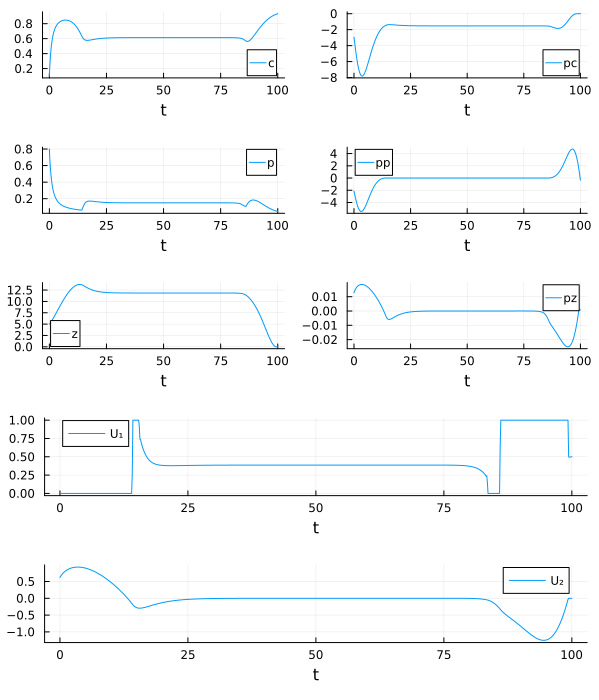

In [4]:
OCP(;u2max = 10,n=1)

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_vmdkxodcz6\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_xY1GHY9GBU\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_R21aB2pENs\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


This is Ipopt version 3.14.17, running with linear solver MUMPS 5.8.0.

Number of nonzeros in equality constraint Jacobian...:    59204
Number of nonzeros in inequality constraint Jacobian.:     3204
Number of nonzeros in Lagrangian Hessian.............:    44000

Total number of variables............................:    11204
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     2403
                     variables with only upper bounds:        0
Total number of equality constraints.................:     9604
Total number of inequality constraints...............:     2403
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:     1602
        inequality constraints with only upper bounds:      801

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.35e+00 1.00e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00 

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_j81KNkDsNE\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_tgP0voFKhW\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_hkXQzATSfk\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


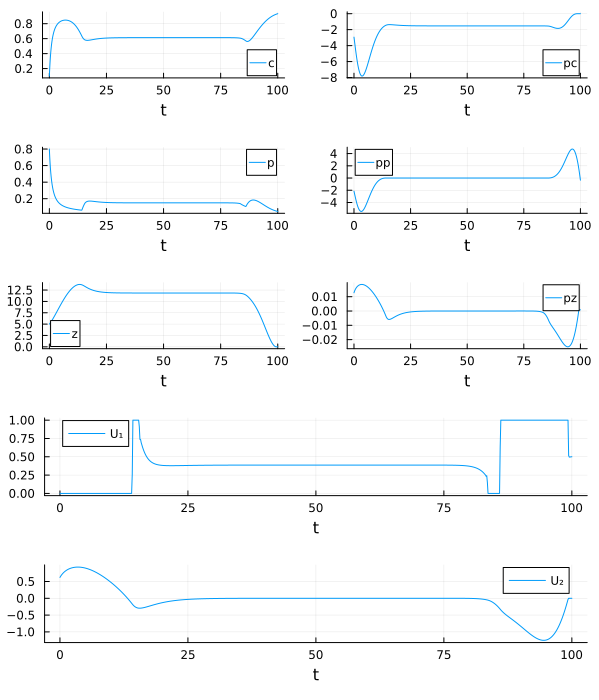

In [5]:
OCP(;u2max = 5,n=1)